## The Lords of the Ocean: Ships of the East India Company

#### The East India Company was the largest and most powerful company that the world has ever seen.

Concerned that the English were falling behind to the Dutch on these new trading routes, on the 31st December 1600 Queen Elizabeth I granted over 200 English merchants the right to trade in the East Indies. One of these groups of merchants called themselves Governor and Company of Merchants of London Trading into the East Indies, later to become simply The East India Company. This strategy appeared to pay off, as by the 1700s the Company had grown so large that it had come to dominate the global textile trade, and had even amassed its own army in order to protect its interests. Most of the forces were based at the three main ‘stations’ in India, at Madras, Bombay and Bengal. 

[~Source: https://en.wikipedia.org/wiki/East_India_Company]

>**This assignment looks at the East India Company's ships travelling to India, their route, what wind directions were favourable for a journey of this kind and how their activity varied over a 100 years. It also features the longest serving ship in the EIC fleet--Swallow, rechristened later as the HMS Lily by the Royal Navy.**


In [1]:
#Importing necesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

#Reading csv file
df = pd.read_csv('CLIWOC15.csv', header=0)


/Users/naz/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,6,7,8,11,13,18,19,23,24,25,26,28,29,30,34,35,38,43,44,46,73,77,81,82,84,85,87,88,94,96,97,98,99,111,114,116,119,120,122,124,125,127,129,131,133,135,137,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


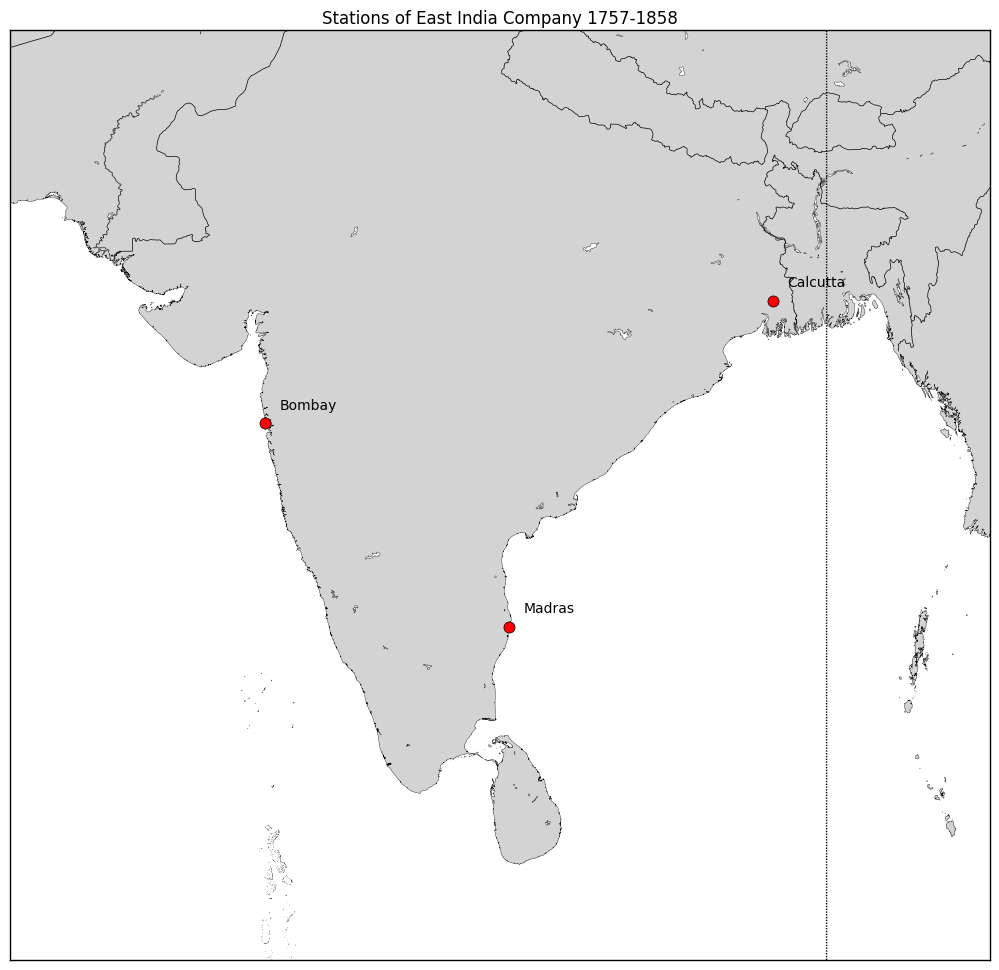

In [4]:
# Setting up map characteristics to focus on the Indian subcontinent
map = Basemap(projection='merc', 
                 lat_0=10, lon_0=80, 
                 resolution='h', 
                 area_thresh=0.1, 
                 llcrnrlon=65, llcrnrlat=3,
                 urcrnrlon=95, urcrnrlat=30)
 
# Drawing up a simple map
fig = plt.figure(figsize=(16, 12))
map.drawcoastlines(linewidth=0.25)
map.drawcountries()
map.fillcontinents(color='#d3d3d3')
map.drawmapboundary()
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))


#### Reference: http://introtopython.org/visualization_earthquakes.html
# Plotting positions of three Indian cities claimed by the EIC as headqurters
lons = [72.8, 80.27, 88.36]
lats = [19.07, 13.08, 22.57]
x,y = map(lons, lats)
# Plots points taking latitudes and longitudes from list created above 
map.plot(x, y, 'ro', markersize=8)

# Labelling each port on map 
labels = ['Bombay', 'Madras', 'Calcutta']
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+50000, ypt+50000, label)

# Assigning a title to the map
plt.title('Stations of East India Company 1757-1858')

plt.show()


In [15]:
#Storing journeys made to specific cities in different data frames 
dfMadras = df[(df.VoyageTo == 'Madras') & (df.ShipName.notnull()) & (df.Year.notnull()) & (df.Nationality.notnull()) & (df.Lon3.notnull()) & (df.Lat3.notnull()) & (df.Month.notnull()) & (df.WindDirection.notnull())]
dfCalcutta = df[(df.VoyageTo == 'Calcutta') & (df.ShipName.notnull()) & (df.Year.notnull()) & (df.Nationality.notnull()) & (df.Lon3.notnull()) & (df.Lat3.notnull()) & (df.Month.notnull())]
dfBombay = df[(df.VoyageTo == 'Bombay') & (df.ShipName.notnull()) & (df.Year.notnull()) & (df.Nationality.notnull()) & (df.Lon3.notnull()) & (df.Lat3.notnull()) & (df.Month.notnull())]

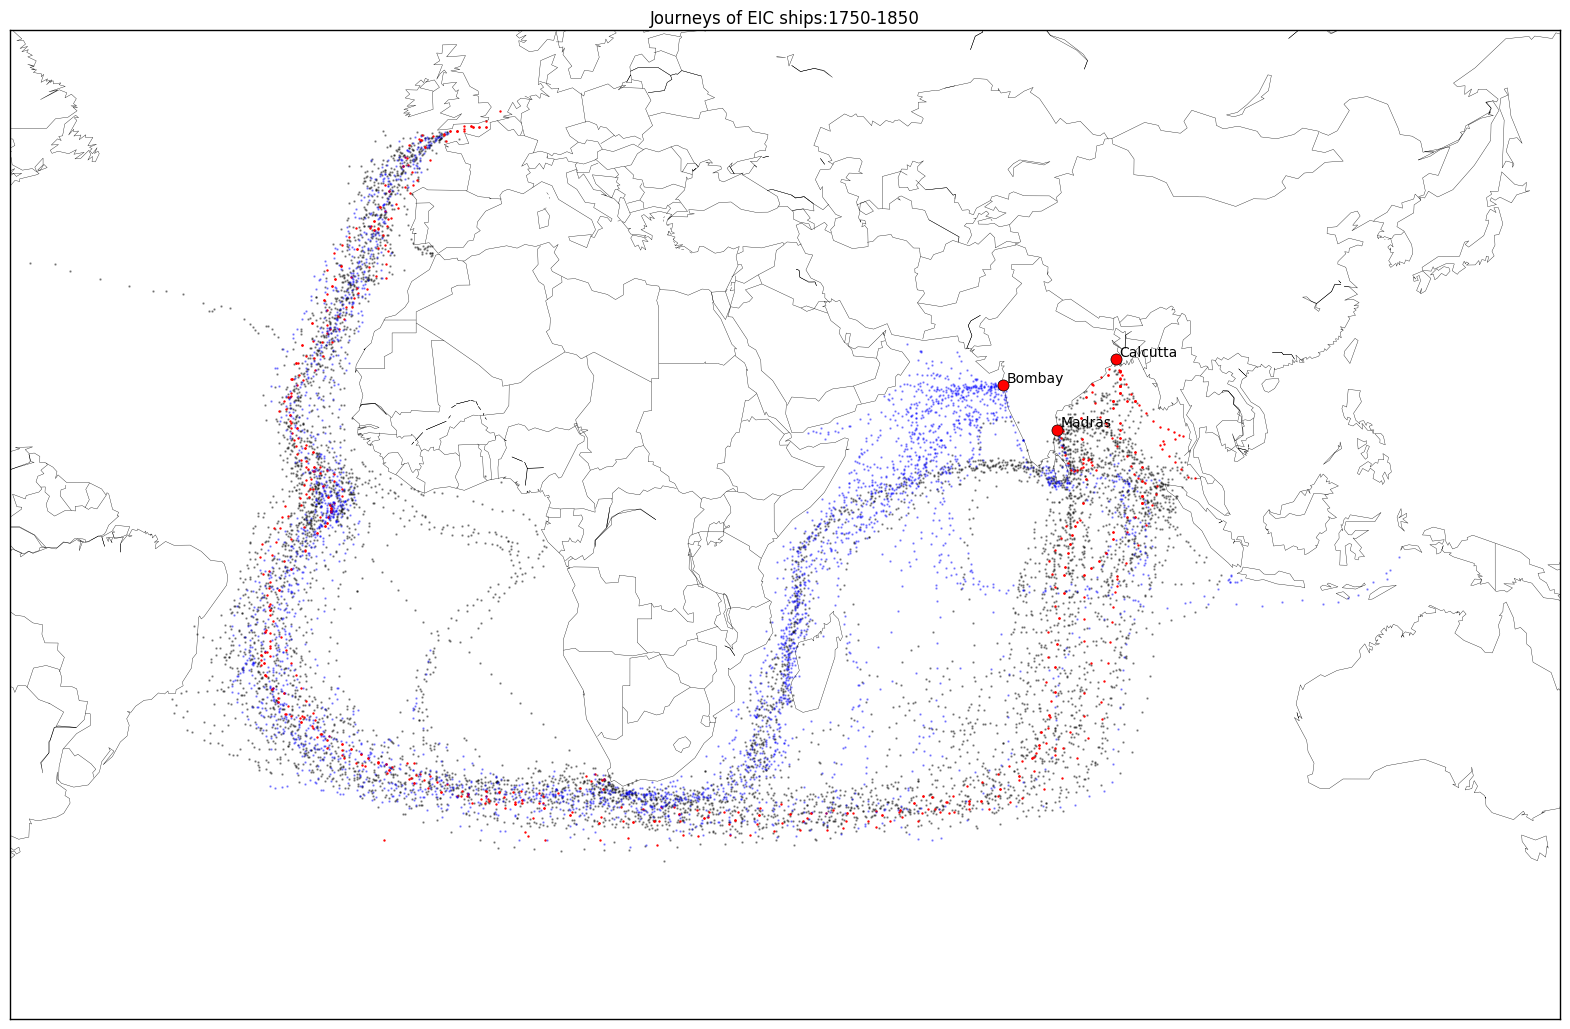

In [16]:
#All journeys made to India during 1750 to 1850
fig = plt.figure(figsize=(20, 14))
markersize = 2
markertype = '.'
markercolor = '#000000'
markeralpha = .4

m = Basemap(projection='mill',
            llcrnrlon=-65, llcrnrlat=-60,
            urcrnrlon=150, urcrnrlat=60)
m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25)
#m.fillcontinents(color='coral',lake_color='aqua')

# Avoid border around map.
#m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

# Reference: https://github.com/mmeagher/ARC6818/blob/master/workshops/workshop%205.ipynb
# Convert locations to x/y coordinates and plot them as dots.
x, y = m(dfMadras.Lon3.values, dfMadras.Lat3.values)
m.scatter(x, y, markersize, marker=markertype, color=markercolor, alpha=markeralpha)

x, y = m(dfCalcutta.Lon3.values, dfCalcutta.Lat3.values)
m.scatter(x, y, 2, marker=markertype, color='red', alpha=1)

x, y = m(dfBombay.Lon3.values, dfBombay.Lat3.values)
m.scatter(x, y, 2, marker=markertype, color='blue', alpha=markeralpha)

# Plotting markers for destination ports
lons = [72.8, 80.27, 88.36]
lats = [19.07, 13.08, 22.57]
x,y = m(lons, lats)
m.plot(x, y, 'ro', markersize=8)

labels = ['Bombay', 'Madras', 'Calcutta']
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+50000, ypt+50000, label)

plt.title('Journeys of EIC ships:1750-1850')
plt.show()

### Needing to exploit favourable winds, ships tended to follow similar routes.

>EIC vessels sailing from Britain tended to follow a seasonal pattern by departing
>during the winter and spring months, usually between December and May. This
allowed them to enter the Indian Ocean soon after the commencement of the SW
monsoon giving favourable winds to their destinations. 

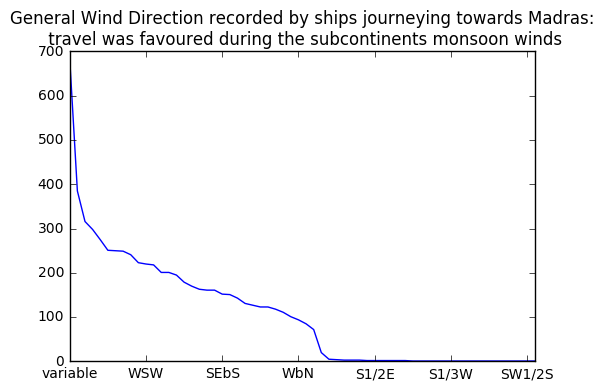

In [23]:
## Reference: http://matplotlib.org/users/pyplot_tutorial.html
dfMadWind=dfMadras.WindDirection.value_counts()     ##Wind Directions of ships jouneying towards Madras
dfMadWind.plot()
plt.title('General Wind Direction recorded by ships journeying towards Madras:\n travel was favoured during the subcontinents monsoon winds')

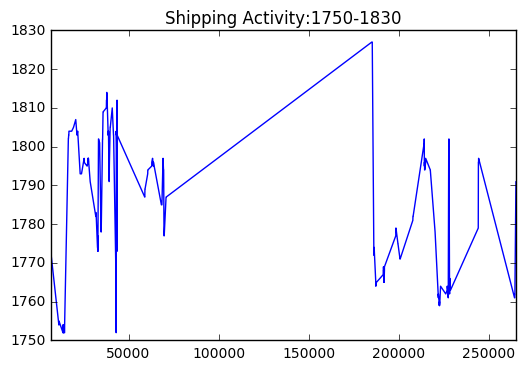

In [21]:
dfMadras.Year.plot()
plt.title('Shipping Activity:1750-1830')

The graph above shows increased shipping acitivity around the later half of the 18th century. If this information is matched with historical records, it is evident that with the weakening of the Dutch stronghold in India at the turn of the century, The EIC showed increased activity over the subcontinents waters. 

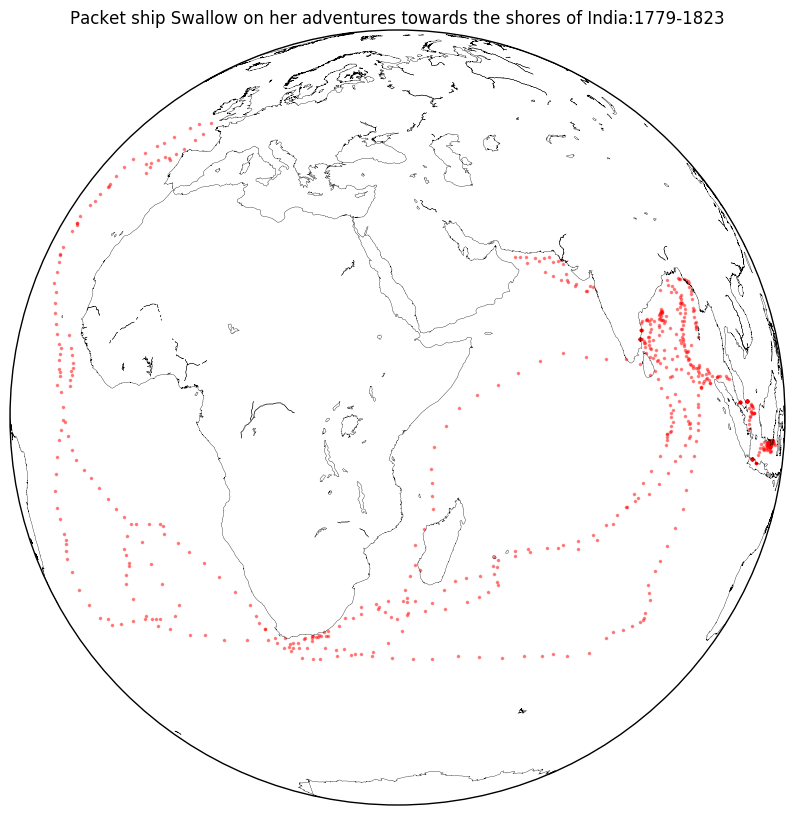

In [14]:
##Following the voyages of the carrier Swallow, later re-christened HMS Lily by the Royal Navy, as she navigates her
## way back and forth through 9 journeys between India and England.

# Reference: https://github.com/mmeagher/ARC6818/blob/master/workshops/workshop%205.ipynb
# Plotting Swallow's adventures onto a map.
dfSwallow = df[(df.ShipName == 'Swallow') & (df.Lat3.notnull()) & (df.Lon3.notnull())]
markersize = 10
markertype = '.'
markercolor = '#000000'
markeralpha = .4

fig = plt.figure(figsize=(14, 10))
m = Basemap(projection='ortho',
            lat_0=0,
            lon_0=40,
            resolution='l')
m.drawcoastlines(linewidth=0.25)
# m.drawcountries(linewidth=0.25)
# m.fillcontinents(color='coral',lake_color='aqua')

# Avoid border around map.
#m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

# Convert locations to x/y coordinates and plot them as dots.
x, y = m(dfSwallow.Lon3.values, dfSwallow.Lat3.values)
m.scatter(x, y, markersize,marker=markertype, color='red', alpha=markeralpha)
plt.title('Packet ship Swallow on her adventures towards the shores of India:1779-1823')
plt.show()

### Dutch vs British occupied India
##### As evidenced by the routes followed by Swallow over the years, the favoured route for British EIC vessels was to travel from the Cape of Good Hope around the tip of India towards its eastern shores--since the west coast was dominated by Dutch and Portuguese Indian ports. It was only at the beginning of the 19th cent. that the British were able to firmly establish a stronghold in Bombay--by then the Swallow had been sold to the Royal Navy.
The route of East India and RN vessels towards the Cape of Good Hope has been
as shown above. Once past the Cape the usual route to India was through the
Mozambique Channel. This track was less favoured except by those vessels bound to Bombay or requiring a stop at Madagascar because the west coast was generally not considered to be favourable for harbour development during the 18th century-- the Portuguese and the Dutch dominated the coast from Surat to Goa. Although Calcutta became the EIC base, Madras was for a long time the first port of call for Calcutta bound ships From the mid 1780s, those vessels bound to Madras and Calcutta would sail east to the meridian of Sri Lanka before adopting a northerly course to their destination. 

Although there are no ship records in the CLIWOC Database, Swallow's most notable exploit occurred on her seventh voyage, when she helped capture seven Dutch East Indiamen on 15 June 1795. 

[Reference: http://icoads.noaa.gov/reclaim/pdf/Pre-20thC_British_logbooks_report_version_2009_2.pdf]